In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

data = [
    ('Lee',   23, 'M', 2700, 1),
    ('Rina',  23, 'F', 2600, 2),
    ('Tono',  23, 'M', 2500, 1),
    ('Zaki',  23, 'M', 2400, 1),

    ('Budi',  25, 'M', 3500, 1),
    ('Sarah', 25, 'F', 3000, 2),
    ('Dian',  25, 'F', 3200, 2),
    ('Nina',  25, 'F', 2800, 2),
    ('Tari',  25, 'F', 3300, 1),

    ('Anna',  28, 'F', 4100, 2),
    ('Siti',  28, 'F', 3500, 1),
    ('Dika',  28, 'M', 3200, 1),
    ('Reno',  28, 'M', 2900, 1),
    ('Tina',  28, 'F', 2700, 2),

    ('John',  31, 'M', 4500, 2),
    ('Andi',  31, 'M', 4000, 1),
    ('Ayu',   31, 'F', 4600, 2),
    ('Rara',  31, 'F', 4200, 1)
]

columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')

# Query examples
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) AS avg_salary FROM employees').show()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/31 06:03:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/10/31 06:03:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
                                                                                

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|  Lee| 23|     M|  2700|     1|
| Rina| 23|     F|  2600|     2|
| Tono| 23|     M|  2500|     1|
| Zaki| 23|     M|  2400|     1|
| Budi| 25|     M|  3500|     1|
|Sarah| 25|     F|  3000|     2|
| Dian| 25|     F|  3200|     2|
| Nina| 25|     F|  2800|     2|
| Tari| 25|     F|  3300|     1|
| Anna| 28|     F|  4100|     2|
| Siti| 28|     F|  3500|     1|
| Dika| 28|     M|  3200|     1|
| Reno| 28|     M|  2900|     1|
| Tina| 28|     F|  2700|     2|
| John| 31|     M|  4500|     2|
| Andi| 31|     M|  4000|     1|
|  Ayu| 31|     F|  4600|     2|
| Rara| 31|     F|  4200|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Budi| 25|
|Dian| 25|
|Tari| 25|
|Anna| 28|
|Siti| 28|
|Dika| 28|
|John| 31|
|Andi| 31|
| Ayu| 31|
|Rara| 31|
+----+---+

+------------------+
|        avg_salary|
+------------------+
|3316.6666666666665|
+------------------+



In [ ]:
# Latihan2
spark.sql('''
SELECT
    Gender,
    Age,
    SUM(Salary) AS TotalSalary
FROM
    employees
GROUP BY
    Gender,
    Age
ORDER BY
    Gender, Age
''').show()

# Tugas2
# Rata-rata Gaji per departemen
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
ORDER BY DeptId
''').show()

# Karyawan dengan gaji diatas rata-rata per gender
spark.sql('''
WITH avg_gender AS (
  SELECT Gender, AVG(Salary) AS avg_salary
  FROM employees
  GROUP BY Gender
)
SELECT e.Name, e.Gender, e.Salary, a.avg_salary
FROM employees e
JOIN avg_gender a ON e.Gender = a.Gender
WHERE e.Salary > a.avg_salary
''').show()

# Ranking gaji per departemen
spark.sql('''
SELECT
  Name,
  DeptId,
  Salary,
  RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS RankInDept
FROM employees
ORDER BY DeptId, RankInDept
''').show()


+------+---+-----------+
|Gender|Age|TotalSalary|
+------+---+-----------+
|     F| 23|       2600|
|     F| 25|      12300|
|     F| 28|      10300|
|     F| 31|       8800|
|     M| 23|       7600|
|     M| 25|       3500|
|     M| 28|       6100|
|     M| 31|       8500|
+------+---+-----------+



+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   3220.0|
|     2|   3437.5|
+------+---------+



+----+------+------+----------+
|Name|Gender|Salary|avg_salary|
+----+------+------+----------+
|Budi|     M|  3500|    3212.5|
|Anna|     F|  4100|    3400.0|
|Siti|     F|  3500|    3400.0|
| Ayu|     F|  4600|    3400.0|
|Rara|     F|  4200|    3400.0|
|John|     M|  4500|    3212.5|
|Andi|     M|  4000|    3212.5|
+----+------+------+----------+



+-----+------+------+----------+
| Name|DeptId|Salary|RankInDept|
+-----+------+------+----------+
| Rara|     1|  4200|         1|
| Andi|     1|  4000|         2|
| Budi|     1|  3500|         3|
| Siti|     1|  3500|         3|
| Tari|     1|  3300|         5|
| Dika|     1|  3200|         6|
| Reno|     1|  2900|         7|
|  Lee|     1|  2700|         8|
| Tono|     1|  2500|         9|
| Zaki|     1|  2400|        10|
|  Ayu|     2|  4600|         1|
| John|     2|  4500|         2|
| Anna|     2|  4100|         3|
| Dian|     2|  3200|         4|
|Sarah|     2|  3000|         5|
| Nina|     2|  2800|         6|
| Tina|     2|  2700|         7|
| Rina|     2|  2600|         8|
+-----+------+------+----------+



In [ ]:
# Latihan3
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

# Tugas3
# Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.
spark.sql('''
SELECT
    Name,
    Age,
    Gender,
    Salary,
    DeptId,
    rank
FROM (
    SELECT
        Name,
        Age,
        Gender,
        Salary,
        DeptId,
        ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) AS rank
    FROM employees
)
WHERE rank <= 3
ORDER BY Age, rank
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Rina| 23|  2600|   2|
| Tono| 23|  2500|   3|
| Zaki| 23|  2400|   4|
| Budi| 25|  3500|   1|
| Tari| 25|  3300|   2|
| Dian| 25|  3200|   3|
|Sarah| 25|  3000|   4|
| Nina| 25|  2800|   5|
| Anna| 28|  4100|   1|
| Siti| 28|  3500|   2|
| Dika| 28|  3200|   3|
| Reno| 28|  2900|   4|
| Tina| 28|  2700|   5|
|  Ayu| 31|  4600|   1|
| John| 31|  4500|   2|
| Rara| 31|  4200|   3|
| Andi| 31|  4000|   4|
+-----+---+------+----+



[Stage 27:>                                                         (0 + 1) / 1]

+----+---+------+------+------+----+
|Name|Age|Gender|Salary|DeptId|rank|
+----+---+------+------+------+----+
| Lee| 23|     M|  2700|     1|   1|
|Rina| 23|     F|  2600|     2|   2|
|Tono| 23|     M|  2500|     1|   3|
|Budi| 25|     M|  3500|     1|   1|
|Tari| 25|     F|  3300|     1|   2|
|Dian| 25|     F|  3200|     2|   3|
|Anna| 28|     F|  4100|     2|   1|
|Siti| 28|     F|  3500|     1|   2|
|Dika| 28|     M|  3200|     1|   3|
| Ayu| 31|     F|  4600|     2|   1|
|John| 31|     M|  4500|     2|   2|
|Rara| 31|     F|  4200|     1|   3|
+----+---+------+------+------+----+



In [ ]:
# tugas 4
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup
employees = spark.createDataFrame([
    ('Lee',   23, 'M', 2700, 1),
    ('Rina',  23, 'F', 2600, 2),
    ('Tono',  23, 'M', 2500, 1),
    ('Zaki',  23, 'M', 2400, 1),

    ('Budi',  25, 'M', 3500, 1),
    ('Sarah', 25, 'F', 3000, 2),
    ('Dian',  25, 'F', 3200, 2),
    ('Nina',  25, 'F', 2800, 2),
    ('Tari',  25, 'F', 3300, 1),

    ('Anna',  28, 'F', 4100, 2),
    ('Siti',  28, 'F', 3500, 1),
    ('Dika',  28, 'M', 3200, 1),
    ('Reno',  28, 'M', 2900, 1),
    ('Tina',  28, 'F', 2700, 2),

    ('John',  31, 'M', 4500, 2),
    ('Andi',  31, 'M', 4000, 1),
    ('Ayu',   31, 'F', 4600, 2),
    ('Rara',  31, 'F', 4200, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])

projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Query: Multiple Join + Subquery
spark.sql('''
SELECT
    e.Name,
    e.Age,
    d.DeptName,
    p.ProjectName,
    e.Salary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
WHERE e.Salary > (
    SELECT AVG(Salary)
    FROM employees
    WHERE DeptId = e.DeptId
)
ORDER BY e.DeptId, e.Salary DESC
''').show()

# Tugas 5
spark.sql('''
SELECT
    e.Name,
    e.Gender,
    d.DeptName,
    e.Salary,
    ROUND(AVG(e.Salary) OVER (PARTITION BY e.DeptId), 2) AS avg_salary_per_dept,
    RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS rank_in_dept
FROM employees e
JOIN departments d
    ON e.DeptId = d.DeptId
ORDER BY d.DeptName, rank_in_dept
''').show()

# Tugas 6
spark.sql('''
SELECT
    e.Name,
    e.DeptId,
    d.DeptName,
    e.Age,
    e.Salary,
    LAG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS prev_salary,
    (e.Salary - LAG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age)) AS salary_change
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY e.DeptId, e.Age
''').show()



+----+---+---------+-----------+------+
|Name|Age| DeptName|ProjectName|Salary|
+----+---+---------+-----------+------+
|Rara| 31|       HR|  Project A|  4200|
|Andi| 31|       HR|  Project A|  4000|
|Budi| 25|       HR|  Project A|  3500|
|Siti| 28|       HR|  Project A|  3500|
|Tari| 25|       HR|  Project A|  3300|
| Ayu| 31|Marketing|  Project B|  4600|
|John| 31|Marketing|  Project B|  4500|
|Anna| 28|Marketing|  Project B|  4100|
+----+---+---------+-----------+------+



+-----+------+---------+------+-------------------+------------+
| Name|Gender| DeptName|Salary|avg_salary_per_dept|rank_in_dept|
+-----+------+---------+------+-------------------+------------+
| Rara|     F|       HR|  4200|             3220.0|           1|
| Andi|     M|       HR|  4000|             3220.0|           2|
| Budi|     M|       HR|  3500|             3220.0|           3|
| Siti|     F|       HR|  3500|             3220.0|           3|
| Tari|     F|       HR|  3300|             3220.0|           5|
| Dika|     M|       HR|  3200|             3220.0|           6|
| Reno|     M|       HR|  2900|             3220.0|           7|
|  Lee|     M|       HR|  2700|             3220.0|           8|
| Tono|     M|       HR|  2500|             3220.0|           9|
| Zaki|     M|       HR|  2400|             3220.0|          10|
|  Ayu|     F|Marketing|  4600|             3437.5|           1|
| John|     M|Marketing|  4500|             3437.5|           2|
| Anna|     F|Marketing| 

[Stage 23:>                                                         (0 + 2) / 2]

+-----+------+---------+---+------+-----------+-------------+
| Name|DeptId| DeptName|Age|Salary|prev_salary|salary_change|
+-----+------+---------+---+------+-----------+-------------+
|  Lee|     1|       HR| 23|  2700|       NULL|         NULL|
| Tono|     1|       HR| 23|  2500|       2700|         -200|
| Zaki|     1|       HR| 23|  2400|       2500|         -100|
| Budi|     1|       HR| 25|  3500|       2400|         1100|
| Tari|     1|       HR| 25|  3300|       3500|         -200|
| Siti|     1|       HR| 28|  3500|       3300|          200|
| Dika|     1|       HR| 28|  3200|       3500|         -300|
| Reno|     1|       HR| 28|  2900|       3200|         -300|
| Andi|     1|       HR| 31|  4000|       2900|         1100|
| Rara|     1|       HR| 31|  4200|       4000|          200|
| Rina|     2|Marketing| 23|  2600|       NULL|         NULL|
|Sarah|     2|Marketing| 25|  3000|       2600|          400|
| Dian|     2|Marketing| 25|  3200|       3000|          200|
| Nina| 

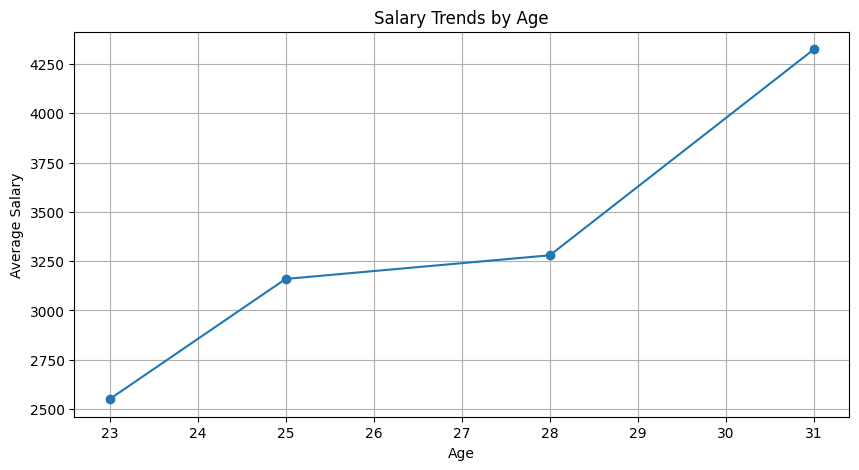

In [ ]:
# Latihan 5
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


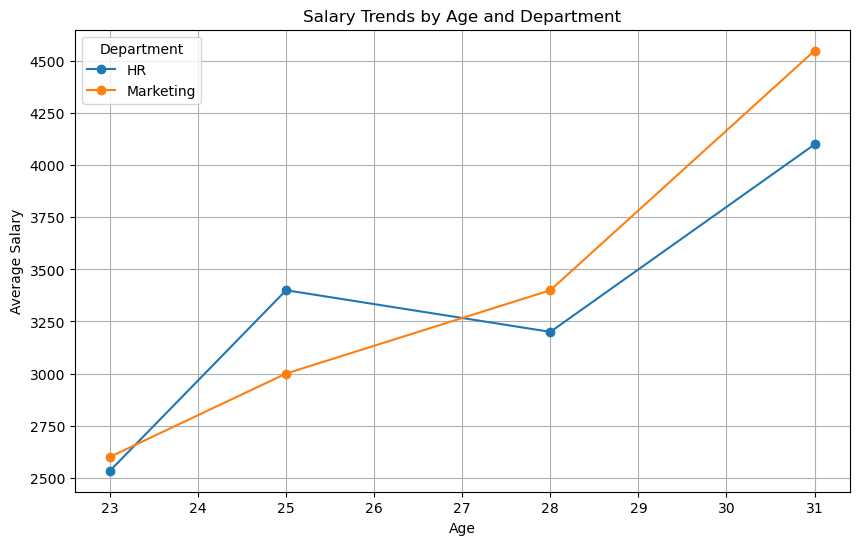

In [ ]:
# Tugas 7
import matplotlib.pyplot as plt
import pandas as pd

# Analisis tren gaji per usia dan departemen
salary_trends = spark.sql('''
SELECT
    d.DeptName,
    e.Age,
    ROUND(AVG(e.Salary), 2) AS AverageSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName, e.Age
ORDER BY d.DeptName, e.Age
''').toPandas()

# Visualisasi tren gaji per departemen
plt.figure(figsize=(10, 6))

for dept in salary_trends['DeptName'].unique():
    dept_data = salary_trends[salary_trends['DeptName'] == dept]
    plt.plot(dept_data['Age'], dept_data['AverageSalary'], marker='o', label=dept)

plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age and Department')
plt.legend(title='Department')
plt.grid(True)
plt.show()


+---------+--------------+-----------+
| DeptName|TotalEmployees|TotalSalary|
+---------+--------------+-----------+
|       HR|            10|      32200|
|Marketing|             8|      27500|
+---------+--------------+-----------+



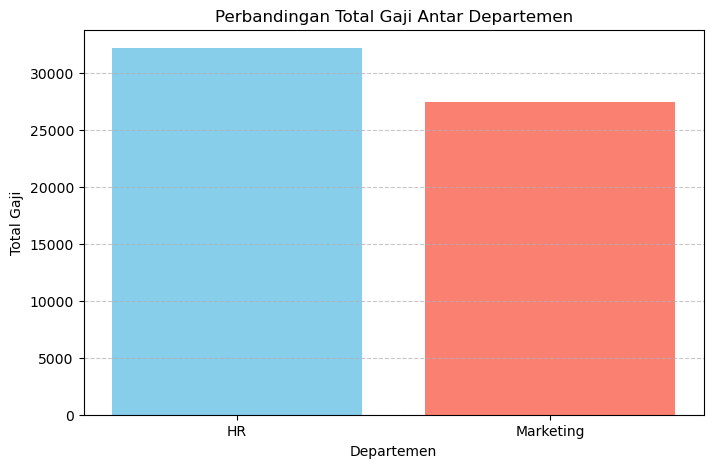

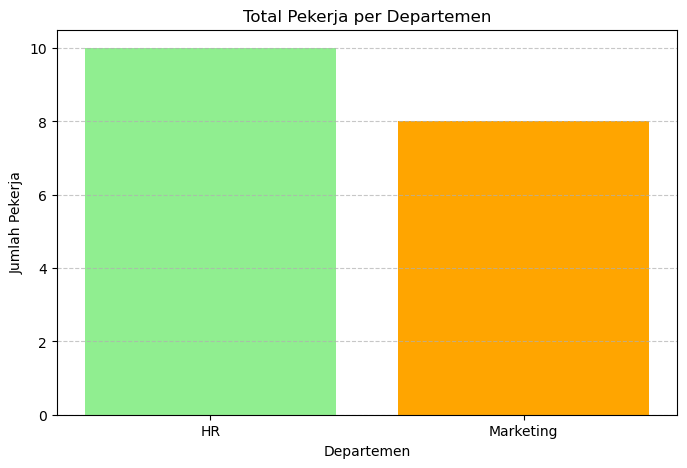

In [ ]:
# Tugas 8
dept_summary = spark.sql('''
SELECT
  d.DeptName,
  COUNT(e.Name) AS TotalEmployees,
  SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''')

dept_summary.show()

import pandas as pd
import matplotlib.pyplot as plt

# Convert ke Pandas untuk visualisasi
df = dept_summary.toPandas()

plt.figure(figsize=(8,5))
plt.bar(df['DeptName'], df['TotalSalary'], color=['skyblue', 'salmon'])
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('Perbandingan Total Gaji Antar Departemen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Grafik 2: Total Pekerja per Departemen
plt.figure(figsize=(8,5))
plt.bar(df['DeptName'], df['TotalEmployees'], color=['lightgreen', 'orange'])
plt.xlabel('Departemen')
plt.ylabel('Jumlah Pekerja')
plt.title('Total Pekerja per Departemen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


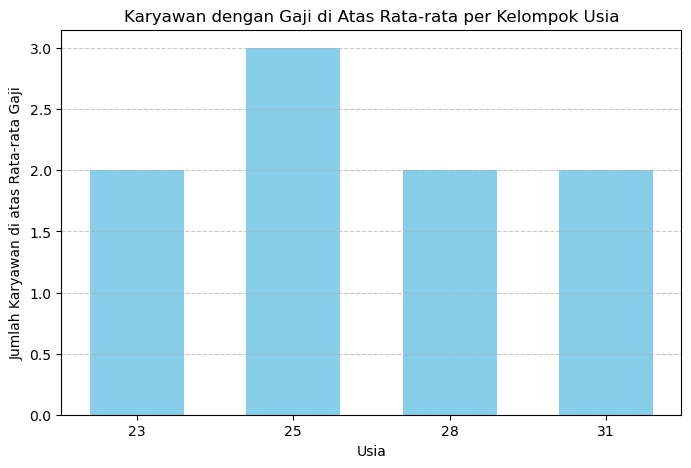

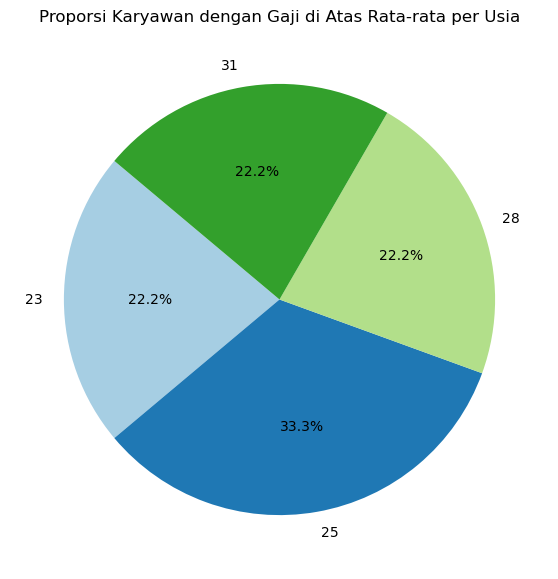

In [ ]:
above_avg_age = spark.sql('''
WITH avg_salary_per_age AS (
    SELECT Age, AVG(Salary) AS avg_salary
    FROM employees
    GROUP BY Age
)
SELECT
    e.Name,
    e.Age,
    e.Salary,
    a.avg_salary
FROM employees e
JOIN avg_salary_per_age a
    ON e.Age = a.Age
WHERE e.Salary > a.avg_salary
ORDER BY e.Age, e.Salary DESC
''')

# Bar Chart
count_per_age['Age'] = count_per_age['Age'].astype(int)
count_per_age = count_per_age.sort_values('Age')

# Plot dengan posisi eksplisit
x = range(len(count_per_age))

plt.figure(figsize=(8,5))
plt.bar(x, count_per_age['Count'], color='skyblue', width=0.6)
plt.xticks(x, count_per_age['Age'])
plt.xlabel('Usia')
plt.ylabel('Jumlah Karyawan di atas Rata-rata Gaji')
plt.title('Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(count_per_age['Count'], labels=count_per_age['Age'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi Karyawan dengan Gaji di Atas Rata-rata per Usia')
plt.show()





Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/31 06:49:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/10/31 06:49:18 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/10/31 06:49:18 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


--- Sample Data ---


+----------+------------+---+------+------+
|EmployeeID|Name        |Age|DeptId|Salary|
+----------+------------+---+------+------+
|1         |Employee_001|35 |4     |5292  |
|2         |Employee_002|37 |1     |6284  |
|3         |Employee_003|30 |3     |8648  |
|4         |Employee_004|43 |3     |10151 |
|5         |Employee_005|29 |5     |5813  |
+----------+------------+---+------+------+
only showing top 5 rows



+------+-----------+
|DeptId|   DeptName|
+------+-----------+
|     1|         HR|
|     2|    Finance|
|     3|Engineering|
|     4|      Sales|
|     5|  Marketing|
|     6|    Support|
+------+-----------+


--- Ringkasan Gaji per Departemen ---


+-----------+--------------+-----------+-----------------+---------+---------+
|DeptName   |TotalEmployees|TotalSalary|AvgSalary        |MinSalary|MaxSalary|
+-----------+--------------+-----------+-----------------+---------+---------+
|Engineering|36            |321144     |8920.666666666666|6580     |14779    |
|Sales      |29            |170078     |5864.758620689655|2518     |8785     |
|Finance    |13            |84803      |6523.307692307692|4246     |9694     |
|Marketing  |17            |82456      |4850.35294117647 |2060     |7346     |
|Support    |16            |57248      |3578.0           |2000     |6345     |
|HR         |9             |41212      |4579.111111111111|2000     |8080     |
+-----------+--------------+-----------+-----------------+---------+---------+



Interpretasi (SQL 1):
  - Departemen 'Engineering' memiliki jumlah karyawan terbanyak (36 orang).
  - Departemen dengan Rata-rata Gaji tertinggi adalah 'Engineering' (Rata-rata: $8921).
  - Departemen dengan Rata-rata Gaji terendah adalah 'Support' (Rata-rata: $3578).

--- Statistik Gaji Keseluruhan ---


+--------------+-----------------+------------+-----------------+---------+---------+
|TotalEmployees|MeanSalary       |MedianSalary|SalaryStdDev     |MinSalary|MaxSalary|
+--------------+-----------------+------------+-----------------+---------+---------+
|120           |6307.841666666666|6284        |2415.966389784557|2000     |14779    |
+--------------+-----------------+------------+-----------------+---------+---------+

Interpretasi (SQL 2):
  - Total karyawan adalah 120.
  - Rata-rata gaji (Mean) adalah $6308 dan Nilai Tengah (Median) adalah $6284.
  - Karena Mean lebih tinggi dari Median, distribusi gaji terindikasi sedikit positif (skewed right).

--- Top 10 Pegawai Gaji Tertinggi ---


+----------+------------+---+-----------+------+
|EmployeeID|Name        |Age|DeptName   |Salary|
+----------+------------+---+-----------+------+
|105       |Employee_105|36 |Engineering|14779 |
|71        |Employee_071|34 |Engineering|10960 |
|46        |Employee_046|33 |Engineering|10452 |
|96        |Employee_096|29 |Engineering|10284 |
|4         |Employee_004|43 |Engineering|10151 |
|108       |Employee_108|30 |Engineering|10138 |
|60        |Employee_060|40 |Engineering|10127 |
|80        |Employee_080|24 |Engineering|9984  |
|67        |Employee_067|25 |Engineering|9710  |
|79        |Employee_079|45 |Engineering|9710  |
+----------+------------+---+-----------+------+

Interpretasi (SQL 3):
  - Pegawai dengan gaji tertinggi didominasi oleh departemen dengan basis gaji tinggi, terutama Engineering.

--- Ringkasan Gaji per Kelompok Usia ---
+--------+-----+-----------------+-----------+
|AgeGroup|Count|AvgSalary        |TotalSalary|
+--------+-----+-----------------+-----------+

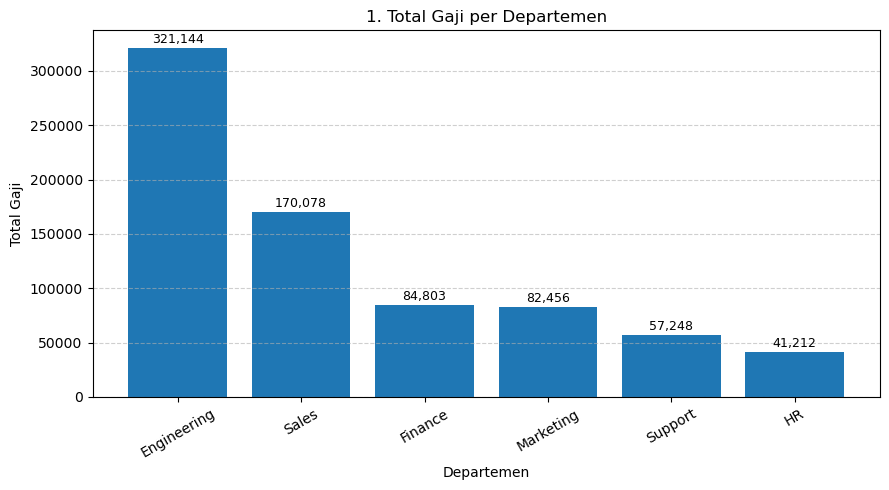

Interpretasi (Visualisasi 1):
  - Total biaya penggajian sangat didominasi oleh departemen Engineering, Sales, dan Marketing, yang merupakan departemen dengan jumlah karyawan terbanyak dan/atau rata-rata gaji tertinggi.
--------------------------------------------------


/tmp/ipykernel_8284/1491734664.py:201: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salaries_by_dept, labels=dept_names, patch_artist=True)


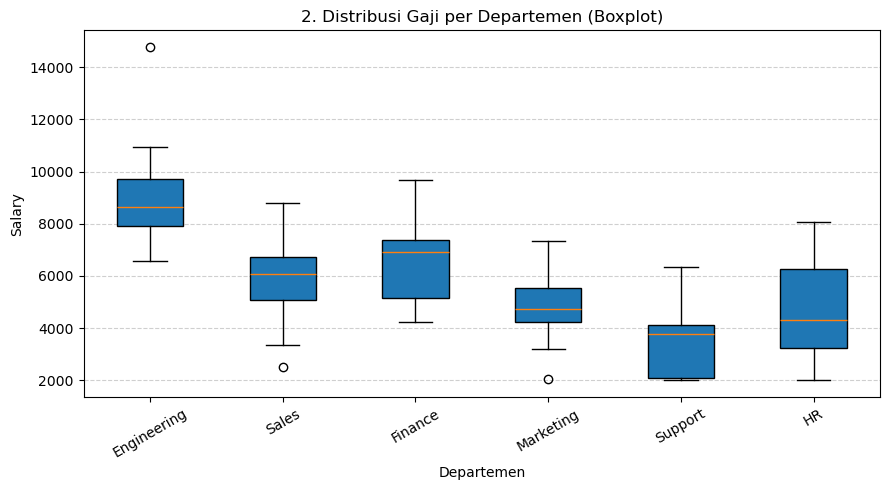

Interpretasi (Visualisasi 2):
  - Boxplot mengkonfirmasi bahwa gaji Engineering memiliki nilai tengah (median) tertinggi. Perhatikan juga jangkauan gaji (panjang kotak) di Engineering dan Sales relatif lebar, menunjukkan variasi gaji yang besar.
--------------------------------------------------


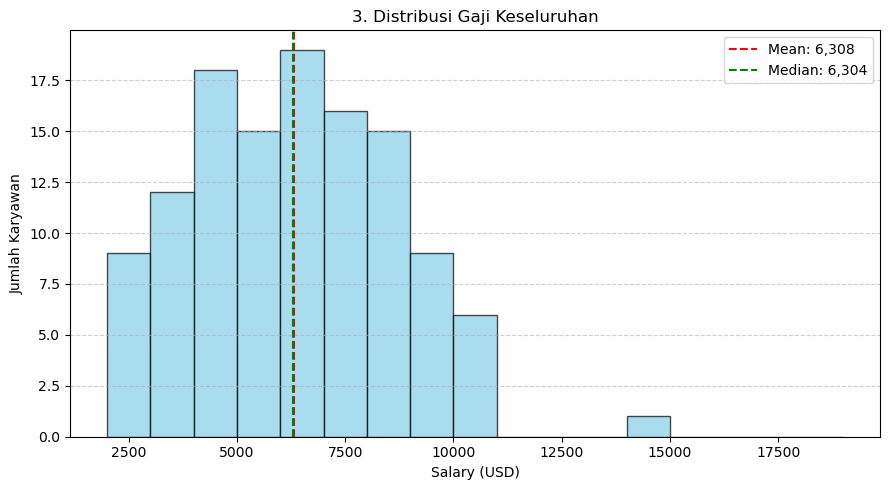

Interpretasi (Visualisasi 3):
  - Distribusi gaji terlihat bimodal atau memiliki beberapa puncak di sekitar basis gaji departemen (misalnya, puncak di sekitar 3000-4000 untuk Support/HR, dan puncak besar di 5000-10000 untuk Sales/Engineering).
  - Posisi Mean (Merah) di sebelah kanan Median (Hijau) menunjukkan adanya skew positif, yaitu ada sejumlah kecil karyawan dengan gaji sangat tinggi yang menarik rata-rata ke atas.
--------------------------------------------------


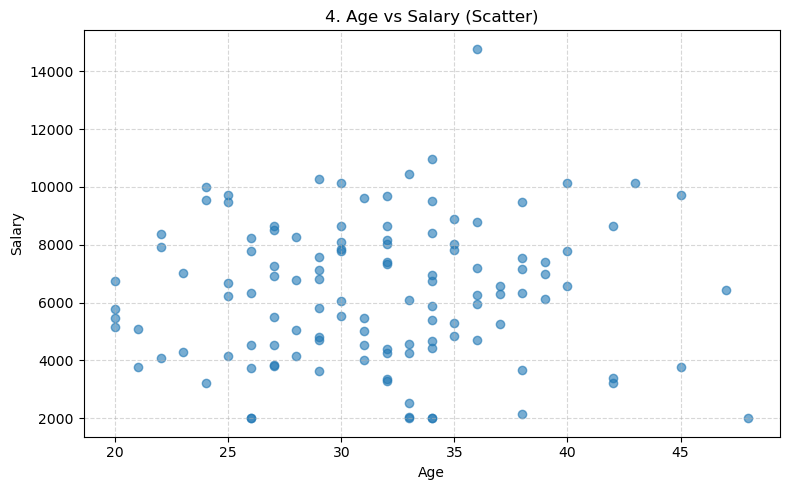

Interpretasi (Visualisasi 4):
  - Tidak ada korelasi linier yang kuat antara Usia dan Gaji dalam dataset buatan ini. Karyawan yang lebih tua (50+) dapat memiliki gaji rendah (Support) maupun tinggi (Engineering/Finance), dan sebaliknya.
--------------------------------------------------


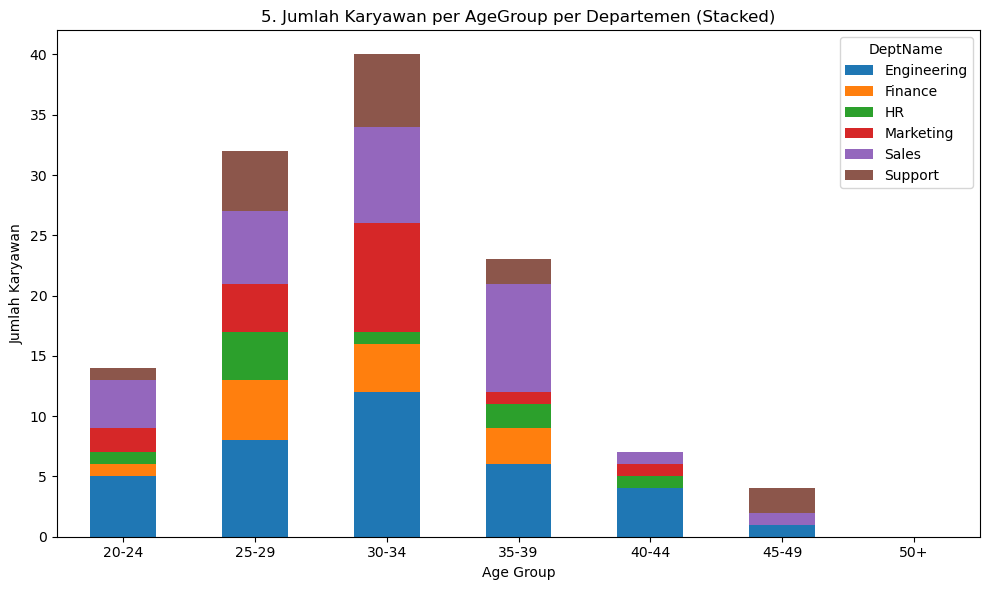

Interpretasi (Visualisasi 5):
  - Departemen Engineering dan Sales mendominasi jumlah karyawan di hampir semua kelompok usia.
  - Kelompok usia 30-34 dan 25-29 adalah kelompok usia terbanyak di perusahaan ini (mencerminkan distribusi normal yang digunakan saat generasi data).
  - Departemen Support memiliki proporsi karyawan termuda (20-24) yang relatif lebih besar dibandingkan departemen lain.
--------------------------------------------------


In [1]:
# Tugas 3: Buat dataset yang lebih besar (100+ baris) dan lakukan analisis mendalam
# menggunakan SQL functions seperti SUM(), AVG(), COUNT(), JOIN, serta buat visualisasi yang menarik.

# ==============================================================================
# 1. SETUP LINGKUNGAN DAN GENERASI DATASET (120 BARIS)
# ==============================================================================

# Inisialisasi Spark (jika belum)
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("SyntheticEmployees") \
    .getOrCreate()

# Libraries
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, StringType, StructType, StructField, FloatType
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

random.seed(42)
np.random.seed(42)

# 1. Departments kecil (6 departemen)
departments = [
    (1, "HR"),
    (2, "Finance"),
    (3, "Engineering"),
    (4, "Sales"),
    (5, "Marketing"),
    (6, "Support"),
]

dept_schema = StructType([
    StructField("DeptId", IntegerType(), False),
    StructField("DeptName", StringType(), False),
])
dept_df = spark.createDataFrame(departments, schema=dept_schema)
dept_df.createOrReplaceTempView("departments")

# 2. Employees: buat >= 120 baris synthetic
n = 120
rows = []
for i in range(1, n+1):
    name = f"Employee_{i:03d}"
    # Usia antara 20 - 60 (distribusi normal dibulatkan)
    age = int(np.clip(int(np.round(np.random.normal(loc=32, scale=7))), 20, 60))
    # Pilih dept random (beri sedikit bias supaya dept tidak rata: Engineering > Sales > Marketing)
    dept_id = random.choices([1,2,3,4,5,6], weights=[8,12,30,25,20,15], k=1)[0]
    # Salary: base berdasar dept + noise (Engineering base 9000, Support base 3500)
    base_by_dept = {1:4000, 2:6000, 3:9000, 4:5500, 5:5000, 6:3500}
    salary = int(np.clip(int(np.random.normal(loc=base_by_dept[dept_id], scale=1500)), 2000, 20000))
    rows.append((i, name, age, dept_id, salary))

emp_schema = StructType([
    StructField("EmployeeID", IntegerType(), False),
    StructField("Name", StringType(), False),
    StructField("Age", IntegerType(), False),
    StructField("DeptId", IntegerType(), False),
    StructField("Salary", IntegerType(), False),
])
employees_df = spark.createDataFrame(rows, schema=emp_schema)
employees_df.createOrReplaceTempView("employees")

print("--- Sample Data ---")
employees_df.show(5, truncate=False)
dept_df.show()

# ==============================================================================
# 2. ANALISIS MENDALAM MENGGUNAKAN SQL
# ==============================================================================

# Total & rata-rata gaji per departemen (JOIN + GROUP BY + SUM + AVG + COUNT)
dept_summary = spark.sql('''
SELECT
    d.DeptName,
    COUNT(e.EmployeeID) AS TotalEmployees,
    SUM(e.Salary) AS TotalSalary,
    AVG(e.Salary) AS AvgSalary,
    MIN(e.Salary) AS MinSalary,
    MAX(e.Salary) AS MaxSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''')
print("\n--- Ringkasan Gaji per Departemen ---")
dept_summary.show(truncate=False)

# Interpretasi Hasil 1: Ringkasan Gaji
pdf_dept = dept_summary.toPandas().sort_values('AvgSalary', ascending=False)
highest_avg = pdf_dept.iloc[0]
lowest_avg = pdf_dept.iloc[-1]
highest_count = dept_summary.sort('TotalEmployees', ascending=False).collect()[0]
print(f"Interpretasi (SQL 1):")
print(f"  - Departemen '{highest_count['DeptName']}' memiliki jumlah karyawan terbanyak ({highest_count['TotalEmployees']} orang).")
print(f"  - Departemen dengan Rata-rata Gaji tertinggi adalah '{highest_avg['DeptName']}' (Rata-rata: ${highest_avg['AvgSalary']:.0f}).")
print(f"  - Departemen dengan Rata-rata Gaji terendah adalah '{lowest_avg['DeptName']}' (Rata-rata: ${lowest_avg['AvgSalary']:.0f}).")


# Statistik gaji keseluruhan (Median dan Standard Deviasi)
salary_stats = spark.sql('''
SELECT
    COUNT(*) as TotalEmployees,
    AVG(Salary) as MeanSalary,
    PERCENTILE_APPROX(Salary, 0.5) as MedianSalary,
    STDDEV_SAMP(Salary) as SalaryStdDev,
    MIN(Salary) as MinSalary,
    MAX(Salary) as MaxSalary
FROM employees
''')
print("\n--- Statistik Gaji Keseluruhan ---")
salary_stats.show(truncate=False)

# Interpretasi Hasil 2: Statistik Keseluruhan
stats = salary_stats.collect()[0]
skew = "sedikit positif (skewed right)" if stats['MeanSalary'] > stats['MedianSalary'] else "sedikit negatif (skewed left)"
print("Interpretasi (SQL 2):")
print(f"  - Total karyawan adalah {stats['TotalEmployees']}.")
print(f"  - Rata-rata gaji (Mean) adalah ${stats['MeanSalary']:.0f} dan Nilai Tengah (Median) adalah ${stats['MedianSalary']:.0f}.")
print(f"  - Karena Mean lebih tinggi dari Median, distribusi gaji terindikasi {skew}.")


# Top 10 highest earners (JOIN department)
top10 = spark.sql('''
SELECT e.EmployeeID, e.Name, e.Age, d.DeptName, e.Salary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY e.Salary DESC
LIMIT 10
''')
print("\n--- Top 10 Pegawai Gaji Tertinggi ---")
top10.show(truncate=False)

# Interpretasi Hasil 3: Top 10
print("Interpretasi (SQL 3):")
print("  - Pegawai dengan gaji tertinggi didominasi oleh departemen dengan basis gaji tinggi, terutama Engineering.")


# Buat kelompok umur (bins) dan analisis per bin
age_bin_summary = spark.sql('''
SELECT
    CASE
        WHEN Age BETWEEN 20 AND 24 THEN '20-24'
        WHEN Age BETWEEN 25 AND 29 THEN '25-29'
        WHEN Age BETWEEN 30 AND 34 THEN '30-34'
        WHEN Age BETWEEN 35 AND 39 THEN '35-39'
        WHEN Age BETWEEN 40 AND 44 THEN '40-44'
        WHEN Age BETWEEN 45 AND 49 THEN '45-49'
        ELSE '50+'
    END AS AgeGroup,
    COUNT(*) AS Count,
    AVG(Salary) AS AvgSalary,
    SUM(Salary) AS TotalSalary
FROM employees
GROUP BY AgeGroup
ORDER BY AgeGroup
''')
print("\n--- Ringkasan Gaji per Kelompok Usia ---")
age_bin_summary.show(truncate=False)

# ==============================================================================
# 3. VISUALISASI DATA
# ==============================================================================

# Convert ke Pandas untuk visualisasi
pdf_dept = dept_summary.toPandas().sort_values('TotalSalary', ascending=False)
pdf_employees = employees_df.toPandas()
pdf_age_bin = age_bin_summary.toPandas().sort_values('AgeGroup')

# 1) Bar chart: Total Salary per Department
plt.figure(figsize=(9,5))
bars = plt.bar(pdf_dept['DeptName'], pdf_dept['TotalSalary'])
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('1. Total Gaji per Departemen')
plt.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 2000, f"{h:,}", ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

print("Interpretasi (Visualisasi 1):")
print("  - Total biaya penggajian sangat didominasi oleh departemen Engineering, Sales, dan Marketing, yang merupakan departemen dengan jumlah karyawan terbanyak dan/atau rata-rata gaji tertinggi.")
print("-" * 50)

# 2) Boxplot: Salary distribution per department
# Persiapkan data per dept
dept_names = [row.DeptName for row in pdf_dept.itertuples()]
salaries_by_dept = []
for dn in dept_names:
    # Ambil DeptId dari DeptName untuk filtering
    dept_id_val = dept_df.filter(F.col('DeptName') == dn).select('DeptId').collect()[0][0]
    arr = employees_df.filter(F.col('DeptId') == dept_id_val).select('Salary').toPandas()['Salary'].values
    salaries_by_dept.append(arr)

plt.figure(figsize=(9,5))
plt.boxplot(salaries_by_dept, labels=dept_names, patch_artist=True)
plt.xlabel('Departemen')
plt.ylabel('Salary')
plt.title('2. Distribusi Gaji per Departemen (Boxplot)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Interpretasi (Visualisasi 2):")
print("  - Boxplot mengkonfirmasi bahwa gaji Engineering memiliki nilai tengah (median) tertinggi. Perhatikan juga jangkauan gaji (panjang kotak) di Engineering dan Sales relatif lebar, menunjukkan variasi gaji yang besar.")
print("-" * 50)

# 3) Histogram: Distribusi gaji keseluruhan
all_salaries = pdf_employees['Salary']
plt.figure(figsize=(9,5))
plt.hist(all_salaries, bins=np.arange(2000, 20000, 1000), color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Salary (USD)')
plt.ylabel('Jumlah Karyawan')
plt.title('3. Distribusi Gaji Keseluruhan')

# Tambahkan garis mean dan median
mean_salary = all_salaries.mean()
median_salary = all_salaries.median()
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_salary:,.0f}')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Interpretasi (Visualisasi 3):")
print("  - Distribusi gaji terlihat bimodal atau memiliki beberapa puncak di sekitar basis gaji departemen (misalnya, puncak di sekitar 3000-4000 untuk Support/HR, dan puncak besar di 5000-10000 untuk Sales/Engineering).")
print("  - Posisi Mean (Merah) di sebelah kanan Median (Hijau) menunjukkan adanya skew positif, yaitu ada sejumlah kecil karyawan dengan gaji sangat tinggi yang menarik rata-rata ke atas.")
print("-" * 50)

# 4) Scatter: Age vs Salary (lihat korelasi)
plt.figure(figsize=(8,5))
plt.scatter(pdf_employees['Age'], pdf_employees['Salary'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('4. Age vs Salary (Scatter)')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("Interpretasi (Visualisasi 4):")
print("  - Tidak ada korelasi linier yang kuat antara Usia dan Gaji dalam dataset buatan ini. Karyawan yang lebih tua (50+) dapat memiliki gaji rendah (Support) maupun tinggi (Engineering/Finance), dan sebaliknya.")
print("-" * 50)

# 5) Stacked bar: jumlah per AgeGroup per Dept
# Buat pivot table di pandas: count per AgeGroup x DeptName
employees_with_dept = spark.sql('''
SELECT e.EmployeeID, e.Age, e.Salary, d.DeptName,
    CASE
        WHEN e.Age BETWEEN 20 AND 24 THEN '20-24'
        WHEN e.Age BETWEEN 25 AND 29 THEN '25-29'
        WHEN e.Age BETWEEN 30 AND 34 THEN '30-34'
        WHEN e.Age BETWEEN 35 AND 39 THEN '35-39'
        WHEN e.Age BETWEEN 40 AND 44 THEN '40-44'
        WHEN e.Age BETWEEN 45 AND 49 THEN '45-49'
        ELSE '50+'
    END AS AgeGroup
FROM employees e JOIN departments d ON e.DeptId = d.DeptId
''').toPandas()

pivot = employees_with_dept.pivot_table(index='AgeGroup', columns='DeptName', values='EmployeeID', aggfunc='count', fill_value=0)
pivot = pivot.reindex(['20-24','25-29','30-34','35-39','40-44','45-49','50+']) # urutkan
pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Age Group')
plt.ylabel('Jumlah Karyawan')
plt.title('5. Jumlah Karyawan per AgeGroup per Departemen (Stacked)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Interpretasi (Visualisasi 5):")
print("  - Departemen Engineering dan Sales mendominasi jumlah karyawan di hampir semua kelompok usia.")
print("  - Kelompok usia 30-34 dan 25-29 adalah kelompok usia terbanyak di perusahaan ini (mencerminkan distribusi normal yang digunakan saat generasi data).")
print("  - Departemen Support memiliki proporsi karyawan termuda (20-24) yang relatif lebih besar dibandingkan departemen lain.")
print("-" * 50)